Importação de bibliotecas que serão utilizadas na análise do Tech Challenge

In [368]:
#Vou importar as bibliotecas necessárias para o projeto

#bibliotecas basicas para análises de dados.
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import os
# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN

# Avaliacao de desempenho
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.metrics import accuracy_score 

from sklearn.preprocessing import LabelEncoder 
# Pre-processamento e escalonamento (Feature Engineering)
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer

# Modelos de Machine Learning para separar teste e treino do modelo
from sklearn.model_selection import train_test_split 


Vamos Importar os dados do ficheiro "medical_insurance.csv" para o Python e criar um DataFrame.

In [369]:
#utilizando o pandas para ler o arquivo csv e colocar no dataframe Dados e fazer um head() para ver a "aparencia dos dados que serão utilizados"
Dados = pd.read_csv('medical_insurance.csv',sep=',')
Dados.head()

,age,sex,bmi,children,smoker,region,charges
0,56,female,29.774374,2,yes,southwest,31109.889763
1,46,male,25.857395,1,no,northeast,26650.702647
2,32,male,23.014840,0,no,southwest,21459.037990
3,19,female,27.900000,0,yes,southwest,16884.924000
4,18,male,33.770000,1,no,southeast,1725.552300


In [370]:
Dados.shape

(4113, 7)

Este dataframe contém 4113 linhas e 7 colunas. Cada linha representa uma pessoa e as colunas são as seguintes: 
    - age: idade da pessoa
    - sex : sexo da pessoa
    - bmi : índice de massa corporal
    - children: número de filhos
    - smoker: se a pessoa fuma ou não
    - region: região em que a pessoa vive
    - charges: o valor da seguro médico
    
O objetivo deste projeto é criar um modelo de machine learning que possa prever o valor da seguro médico de uma pessoa, baseado nas suas características.
Se temos acesso ao valor do historico de seguro médico, podemos prever o valor de uma nova pessoa com base nas características dela.

In [371]:
# Vamos Explorar os dados para saber as informações do dataset
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       4113 non-null   int64  
 1   sex       4113 non-null   object 
 2   bmi       4113 non-null   float64
 3   children  4113 non-null   int64  
 4   smoker    4113 non-null   object 
 5   region    4113 non-null   object 
 6   charges   4113 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 225.1+ KB


Podemos ver que todas as colunas possuem 4113 dados não nulos,que pode nos poupar algum trabalho, o que é bom. Além disso, também podemos avaliar o tipo de dados que o dataset possui.
dtypes: float64(2), int64(2), object(3)

Antes de fazer quaquer análise, vamos ver se a base de dados possui dados repitidos ou não:

In [372]:
duplicados =Dados.duplicated()
duplicados.sum()

2773

Com o comando .duplicated() é possivel observar quais são as linhas duplicadas do dataset. No caso, podemos ver que possuimos 2773 linhas duplicadas.

Com base nesta informação, utilizaremos o comapndo drop_duplicates() para "limpar" a base de dados.

In [373]:
Dados=Dados.drop_duplicates(keep='last')
Dados

,age,sex,bmi,children,smoker,region,charges
0,56,female,29.774374,2,yes,southwest,31109.889763
1,46,male,25.857395,1,no,northeast,26650.702647
2,32,male,23.014840,0,no,southwest,21459.037990
2775,19,female,27.900000,0,yes,southwest,16884.924000
2776,18,male,33.770000,1,no,southeast,1725.552300
...,...,...,...,...,...,...,...
4108,50,male,30.970000,3,no,northwest,10600.548300
4109,18,female,31.920000,0,no,northeast,2205.980800
4110,18,female,36.850000,0,no,southeast,1629.833500
4111,21,female,25.800000,0,no,southwest,2007.945000


de 4113 linhas originais do dataset, o numero caiu para 1340 lihas apenas. com isso, o dataset ficou muito menor. agora vamos avaliar o dataset de modo estatistico para saber o comportamento dos dados. 

Primeiro, vamos utilizar o metodo describe, pois ele mostra o numero de valores nulos, media, desvio padrao, minimo, maximo, 25%, 50%, 75%  da distribuiçao dos dados

In [374]:
Dados.describe()

,age,bmi,children,charges
count,1340.000000,1340.000000,1340.000000,1340.000000
mean,39.234328,30.653494,1.095522,13308.511237
std,14.038686,6.098669,1.204849,12114.136459
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4746.875675
50%,39.000000,30.332500,1.000000,9401.175500
75%,51.000000,34.681250,2.000000,16818.539955
max,64.000000,53.130000,5.000000,63770.428010


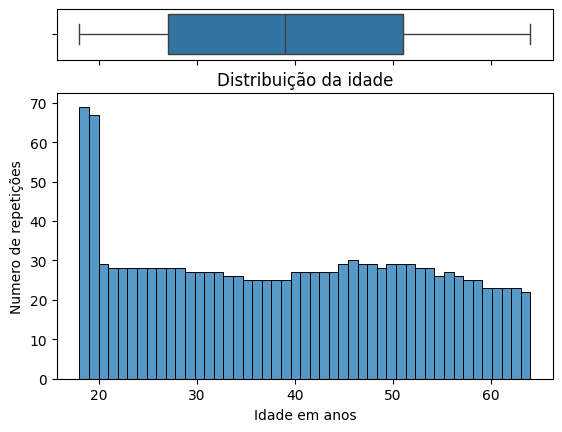

In [375]:
fig , (ax_box,ax_hist)= plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.15,.85)})
sb.boxplot(x=Dados['age'],ax=ax_box)
ax_box.set(xlabel='')

sb.histplot(data=Dados,x='age' ,ax=ax_hist,bins=47,kde=False)
ax_hist.set(title='Distribuição da idade')
ax_hist.set(xlabel='Idade em anos',ylabel='Numero de repetições')
plt.show()

No gráfico das idades, podemos ver que a distribuição das idades é praticamente uniforme , com exceção das idades inferiores a 20 anos, que realmente possuem um numero significativamente maior de pessoas.

Motivo?? - seguros mais baratos ?????



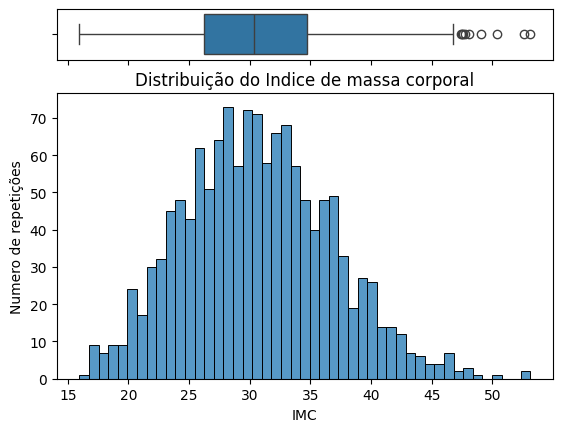

In [376]:
fig , (ax_box,ax_hist)= plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.15,.85)})
sb.boxplot(x=Dados['bmi'],ax=ax_box)
ax_box.set(xlabel='')

sb.histplot(data=Dados,x='bmi' ,ax=ax_hist,bins=47,kde=False)
ax_hist.set(title='Distribuição do Indice de massa corporal')
ax_hist.set(xlabel='IMC',ylabel='Numero de repetições')
plt.show()

Podemos ver que o histograma retorna quase uma distribuição normal (Gaussiana) centrada em um valor proximo a 30, com alguns outliers acima dos 45 de IMC. Agora vamos avaliar o impacto do valor dos fumantes no valor a ser cobrado pelos seguros...

In [377]:
import plotly_express as px

fig= px.histogram(Dados,x='charges',marginal='box',color='smoker')
fig.update_layout(title='Variação do valor entre fumantes x não fumantes',xaxis_title='Valor do Custo',yaxis_title='Frequência', bargap=0.2) 
fig.show()

In [378]:
Dados.smoker.value_counts()

smoker
no     1065
yes     275
Name: count, dtype: int64

PODEMOS AVALIAR QUE OS NÃO FUMANTES POSSUEM UM VAMLOR MÉDIO CONSIDERÁVELMENTE MAIS BAIXO, COM A MÉDIA ESTANDO ABAIXO DOS 10K DOLARES, ENQUANTO A DOS FUMANTES É APROXIMADAMENTE 35-40K DOLARES. É UM FATOR DETERMINANTE PARA O VALOR FINAL DO SEGURO. E existem muito mais não fumantes do que fumantes na bd.

In [379]:
#AGORA VOU AVALIAR CONSOANTE OS GENEROS :

fig= px.histogram(Dados,x='charges',marginal='box',color='sex')
fig.update_layout(title='Distribuição dos generos',xaxis_title='Valor do Custo',yaxis_title='Frequência', bargap=0.2) 
fig.show()

In [380]:
Dados.sex.value_counts()

sex
male      677
female    663
Name: count, dtype: int64

Aqui validamos que a distribuição de generos é praticamente igual em todas as faixas de valores.

In [381]:
fig= px.histogram(Dados,x='charges',marginal='box',color='region')
fig.update_layout(title='Separação por Região',xaxis_title='Valor do Custo',yaxis_title='Frequência', bargap=0.2) 
fig.show()

Aqui podemos ver que a região que mais possui pessoas na base de dados é a "southwest" e a sua maior distribuição está entre pos 0-20k Dolares

In [382]:
px.histogram(Dados,x='smoker',color='sex',title="Fumantes por genero")

Agora vamos avaliar o comportamento das cobranças com a coluna "children" e entender a influencia no numero de filhos e o preço final do seguro:


In [383]:
fig= px.histogram(Dados,x='charges',marginal='box',color='children')
fig.update_layout(title='Numero de crianças x Valor do Seguro',xaxis_title='Valor do Custo',yaxis_title='Frequência', bargap=0.2) 
fig.show()

PODEMOS AVALIAR QUE A MAIOR PARTE DOS DADOS SUGERE QUE A MAIORIA DOS CLIENTES QUE NÃO POSSUEM FILHOS OU ATÉ 1 FILHO POSSUEM OS VALORES MAIS BARATOS DO SEGURO.


In [384]:
#AGORA VOU AVALIAR A INFLUENCIA DA IDADE NO VALOR DAS COBRANÇAS:

fig= px.scatter(Dados, x="age", y="charges", color="smoker",hover_data=['sex'], title="Idade x Valor das Cobranças")
fig.update_traces(marker_size=10)
fig.show()

AQUI PODEMOS IDENTIFICAR QUE QUANTO MAIS ALTA A IDADE DO CLIENTE, A CURVA DE TENDENCIA É DE SUBIR O VALOR A SER COBRADO.
ALÉM DISSO,PODEMOS VER PELAS CORES QUE REALMENTE OS VALORES PRATICADOS PARA FUMANTES SÃO MAIORES DO QUE OS NÃO FUMANTES EM MÉDIA.

A ULTIMA VISUALIZAÇÃO QUE SERÁ APRESENTADA: SERÁ A INFLUENCIA DO IMC NOS VALORES DO SEGURO.

In [385]:
fig = px.scatter(Dados, x='bmi', y='charges', color='smoker',opacity=0.8,  hover_data=['sex'], title='Gráfico de BMI x Custo')
fig.update_traces(marker_size=5)
fig.show()

<AxesSubplot: xlabel='sex', ylabel='charges'>

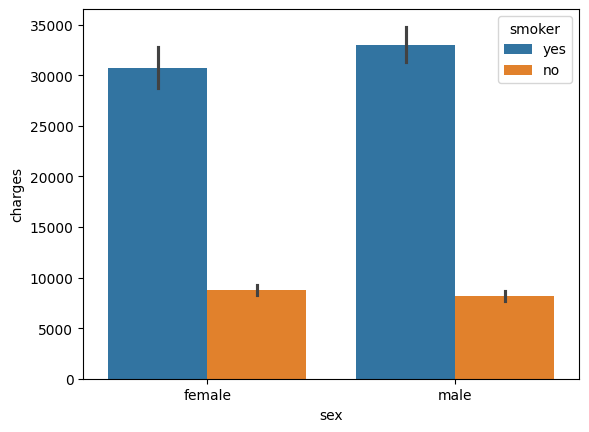

In [386]:
sb.barplot(data = Dados,x = 'sex',y = 'charges',hue = "smoker")


AQUI PODEMOS VER A DIFERENÇA MEDIA DE VALORES COBRADOS DE FUMANTES X NAO FUMANTES , SEPARADOS POR SEXO...
DEFINITIVAMENTE, INDEPENDENTE DO SEXO, A MEDIA DE VALORES COBRADOS DE FUMANTES É MAIOR QUE A MEDIA DE VALORES COBRADOS DE NAO FUMANTES.


AGORA VOU FAZER O ENCODING DOS DADOS: 2 MODOS... LABELENCODER E DUMMY ENCODER...

In [387]:
Dados.head()

Dados_dummy = Dados.copy()

LE = LabelEncoder()
categoricos=['sex','region','smoker']

for col in categoricos:
    nomecol = col + '_LE'
    Dados[col] = LE.fit_transform(Dados[col])
    
Dados.head()




,age,sex,bmi,children,smoker,region,charges
0,56,0,29.774374,2,1,3,31109.889763
1,46,1,25.857395,1,0,0,26650.702647
2,32,1,23.014840,0,0,3,21459.037990
2775,19,0,27.900000,0,1,3,16884.924000
2776,18,1,33.770000,1,0,2,1725.552300


In [388]:
#Vou criar o df dummies para os dados de entrada.

df1=pd.get_dummies(Dados_dummy,columns=categoricos)

df1.dtypes

for col in df1.columns:
    if df1[col].dtype =='bool':
        df1[col] = df1[col].fillna(False).astype('int')
        
df1


,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,56,29.774374,2,31109.889763,1,0,0,0,0,1,0,1
1,46,25.857395,1,26650.702647,0,1,1,0,0,0,1,0
2,32,23.014840,0,21459.037990,0,1,0,0,0,1,1,0
2775,19,27.900000,0,16884.924000,1,0,0,0,0,1,0,1
2776,18,33.770000,1,1725.552300,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4108,50,30.970000,3,10600.548300,0,1,0,1,0,0,1,0
4109,18,31.920000,0,2205.980800,1,0,1,0,0,0,1,0
4110,18,36.850000,0,1629.833500,1,0,0,0,1,0,1,0
4111,21,25.800000,0,2007.945000,1,0,0,0,0,1,1,0


<AxesSubplot: >

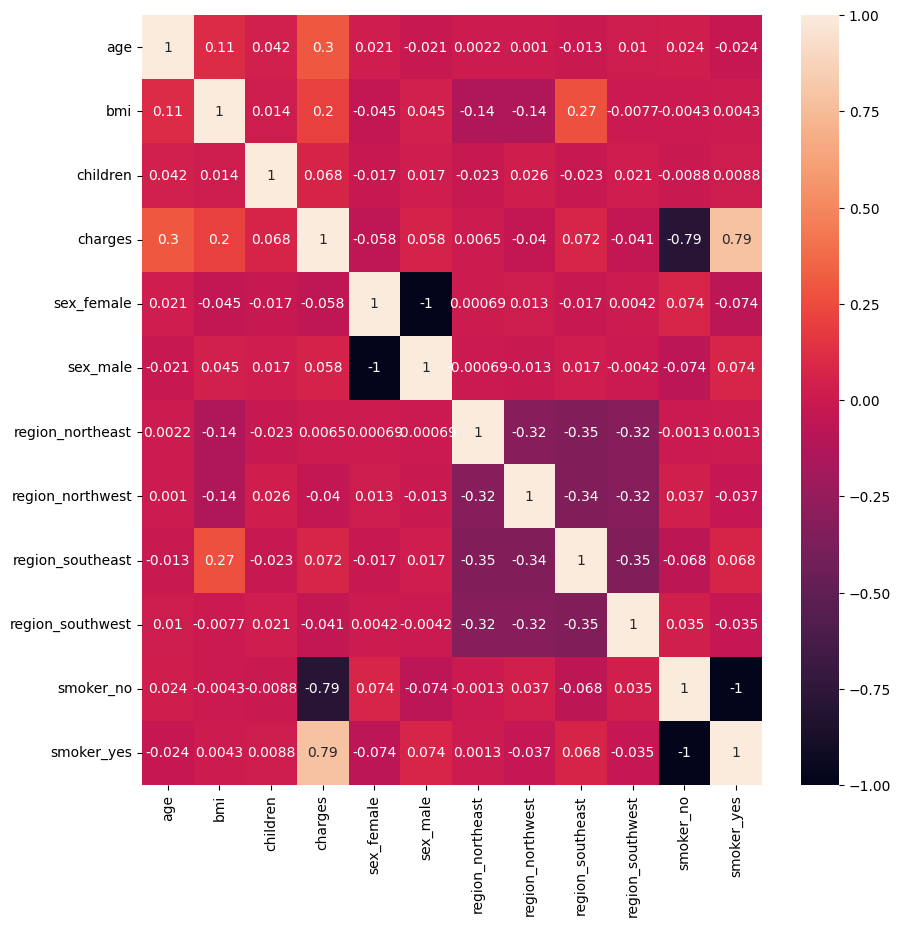

In [389]:
plt.figure(figsize=(10, 10))
sb.heatmap(df1.corr(),annot=True)

In [390]:
X_dados_LE = pd.DataFrame(Dados,columns=['age','sex','bmi','children','smoker','region'])

Y_dados_LE = pd.DataFrame(Dados,columns=['charges'])

Y_dados_LE.head()

,charges
0,31109.889763
1,26650.702647
2,21459.037990
2775,16884.924000
2776,1725.552300


In [391]:
x_dados_dummies=df1.drop(columns=['charges'],axis=1)

y_dados_dummies=df1['charges']

x_dados_dummies


,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,56,29.774374,2,1,0,0,0,0,1,0,1
1,46,25.857395,1,0,1,1,0,0,0,1,0
2,32,23.014840,0,0,1,0,0,0,1,1,0
2775,19,27.900000,0,1,0,0,0,0,1,0,1
2776,18,33.770000,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4108,50,30.970000,3,0,1,0,1,0,0,1,0
4109,18,31.920000,0,1,0,1,0,0,0,1,0
4110,18,36.850000,0,1,0,0,0,1,0,1,0
4111,21,25.800000,0,1,0,0,0,0,1,1,0


In [392]:
#agora vou fazer o train_test_split 
from sklearn.linear_model import LinearRegression
x_train_LE, x_test_LE, y_train_LE, y_test_LE = train_test_split(X_dados_LE, Y_dados_LE, test_size=0.20, random_state=42)

modelo=LinearRegression()
modelo.fit(x_train_LE,y_train_LE)

#previsoes AQUI VOU TESTAR O MEU MODELO

previsoes=modelo.predict(x_test_LE)
previsoes

array([[ 1.13473155e+04],
       [ 7.60869831e+03],
       [ 1.55005095e+04],
       [ 1.14273845e+04],
       [ 1.04981292e+04],
       [ 6.43833952e+03],
       [ 1.40606053e+04],
       [ 9.30720697e+03],
       [ 5.43272987e+03],
       [ 7.92464441e+03],
       [ 5.67855736e+03],
       [ 3.68399026e+04],
       [ 1.34659516e+04],
       [ 2.83825999e+04],
       [ 5.54134595e+03],
       [ 6.36486010e+03],
       [ 3.15244736e+04],
       [ 1.19019784e+04],
       [ 7.97357032e+03],
       [ 6.58631529e+03],
       [ 4.43311512e+03],
       [ 1.55099894e+04],
       [ 3.37347837e+03],
       [ 1.35874518e+04],
       [ 4.70123368e+03],
       [ 1.39041137e+04],
       [ 5.18010086e+03],
       [ 3.35222957e+04],
       [ 2.86903145e+04],
       [ 1.25428592e+04],
       [ 8.22108861e+03],
       [ 3.17399410e+03],
       [ 1.35514832e+04],
       [ 3.18390100e+04],
       [ 5.55035125e+03],
       [ 1.28619806e+04],
       [ 3.71081678e+03],
       [ 1.46004425e+04],
       [ 1.0

In [393]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
erroMMQ=mean_squared_error(y_test_LE,previsoes)
erroABS=mean_absolute_error(y_test_LE,previsoes)
rr2=r2_score(y_test_LE,previsoes)

print('Erro quadratico medio: ',erroMMQ)
print('Erro absoluto medio: ',erroABS)
print('Coeficiente de determinacao: ',rr2)


#previsoes.shape,x_test_LE.shape,y_test_LE.shape,x_train_LE.shape,y_train_LE.shape

def compare(y_test_LE,previsoes):
    compare=pd.DataFrame()
    compare['y_test_LE']=y_test_LE
    compare['previsoes']=previsoes
    compare['diferenca']=abs(compare['y_test_LE']-compare['previsoes'])
    return compare


compare(y_test_LE,previsoes)
    

Erro quadratico medio:  36988918.12534132
Erro absoluto medio:  4163.783113605077
Coeficiente de determinacao:  0.7551913305035904


,y_test_LE,previsoes,diferenca
3167,8964.06055,11347.315477,2383.254927
3654,6311.95200,7608.698308,1296.746308
3131,8944.11510,15500.509465,6556.394365
3140,9778.34720,11427.384456,1649.037256
3032,5400.98050,10498.129167,5097.148667
...,...,...,...
2881,2331.51900,2063.623009,267.895991
3591,2842.76075,1990.877994,851.882756
3311,5972.37800,10275.766926,4303.388926
4059,47403.88000,38853.309782,8550.570218


In [394]:

print(y_test_LE.shape)
print(previsoes.shape)

scores = cross_val_score(modelo,y_test_LE, previsoes)

scores.mean()

(268, 1)
(268, 1)


0.7560084375543975

In [395]:
meus_dados=(31,1,31.3213,0,0,0)   #(idade,sexo,imc,filhos,fuma,local)

array= np.asarray(meus_dados)
print(array)

arrayr=array.reshape((1,-1))
arrayr


meus_dados_previstos= modelo.predict(arrayr)

print(f'os dados previstos são {meus_dados_previstos}')

#x_test_LE

[31.      1.     31.3213  0.      0.      0.    ]
os dados previstos são [[6378.88744767]]


/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [396]:
#agora vou fazer o train_test_split 
from sklearn.linear_model import LinearRegression
x_train_LE, x_test_LE, y_train_LE, y_test_LE = train_test_split(x_dados_dummies, y_dados_dummies, test_size=0.20, random_state=42)

modeloDummy=LinearRegression()

x_dados_dummies.dtypes
modeloDummy.fit(x_train_LE,y_train_LE)

#previsoes AQUI VOU TESTAR O MEU MODELO

previsoes=modeloDummy.predict(x_test_LE)
previsoes

array([ 1.14268389e+04,  7.80018696e+03,  1.52543401e+04,  1.14964995e+04,
        1.02321621e+04,  6.02061563e+03,  1.42522629e+04,  9.39220672e+03,
        5.17779415e+03,  7.98856610e+03,  5.43568526e+03,  3.69454499e+04,
        1.31062036e+04,  2.86011622e+04,  5.57867971e+03,  6.37813469e+03,
        3.15876238e+04,  1.19513889e+04,  7.60728546e+03,  6.77570549e+03,
        4.56085420e+03,  1.57766183e+04,  3.46194136e+03,  1.37212232e+04,
        4.69808287e+03,  1.41996313e+04,  5.16330060e+03,  3.36543992e+04,
        2.83413313e+04,  1.27745431e+04,  8.29417429e+03,  3.20423702e+03,
        1.31624803e+04,  3.15655547e+04,  5.59063253e+03,  1.29829349e+04,
        3.82473293e+03,  1.47730858e+04,  1.05519613e+04,  6.86603746e+03,
        3.20943928e+04,  1.32852823e+04,  3.14105137e+04,  3.81535095e+04,
        7.88993706e+03,  1.31542626e+04,  1.05319134e+04,  2.88631335e+03,
        2.83719348e+04,  2.93822591e+04,  1.36485077e+04,  1.26643921e+04,
        3.32796548e+04,  

In [399]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
erroMMQ=mean_squared_error(y_test_LE,previsoes)
erroABS=mean_absolute_error(y_test_LE,previsoes)
rr2=r2_score(y_test_LE,previsoes)

print('Erro quadratico medio: ',erroMMQ)
print('Erro absoluto medio: ',erroABS)
print('Coeficiente de determinacao: ',rr2)

compare(y_test_LE,previsoes)
x_test_LE.head()

Erro quadratico medio:  37051031.64909648
Erro absoluto medio:  4176.668589024245
Coeficiente de determinacao:  0.7547802363197403


,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
3167,48,31.445,1,0,1,1,0,0,0,1,0
3654,37,29.500,2,1,0,0,0,0,1,1,0
3131,46,43.890,3,0,1,0,0,1,0,1,0
3140,49,30.780,1,1,0,1,0,0,0,1,0
3032,38,40.150,0,1,0,0,0,1,0,1,0


In [401]:

print(y_test_LE.shape)
print(previsoes.shape)

#scores = cross_val_score(modeloDummy,y_test_LE, previsoes)

meus_dados=(31,31.3213,0,0,1,0,0,1,0,1,0)   #(idade,sexo,imc,filhos,fuma,local)

array= np.asarray(meus_dados)
print(array)

arrayr=array.reshape((1,-1))
arrayr


meus_dados_previstos_dummy= modeloDummy.predict(arrayr)

print(f'os dados previstos  são {meus_dados_previstos}')
print(f'os dados previstos dummt são {meus_dados_previstos_dummy}')

(268,)
(268,)
[31.     31.3213  0.      0.      1.      0.      0.      1.      0.
  1.      0.    ]
os dados previstos  são [[6378.88744767]]
os dados previstos dummt são [5413.01792243]


/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

